In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_canada = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
df_canada.drop(['Type','Coverage','AREA','REG','DEV'],axis=1,inplace=True)
df_canada.rename(columns={'OdName':'country','AreaName':'continent','RegName':'region'},inplace=True)
df_canada.set_index('country',inplace=True)
df_canada['total']=df_canada.sum(axis=1)

In [2]:
df_canada.head()

,continent,region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


# Scatter plot of total immigrations to Canada per year (1980 - 2013)

In [7]:
years  =list(range(1980,2014))
df_total = df_canada.loc[:,years].transpose()
df_total['total']=df_total.sum(axis=1)
df_total = df_total.reset_index()
df_total.rename(columns={'index':'year'},inplace=True)
df_total.head()

country,year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe,total
0,1980,16,1,80,0,0,1,0,368,0,...,128,0,0,103,1191,0,1,11,72,99137
1,1981,39,0,67,1,0,3,0,426,0,...,132,0,0,117,1829,0,2,17,114,110563
2,1982,39,0,71,0,0,6,0,626,0,...,146,0,0,174,2162,0,1,11,102,104271
3,1983,47,0,69,0,0,6,0,241,0,...,105,0,0,124,3404,0,6,7,44,75550
4,1984,71,0,63,0,0,4,42,237,0,...,90,0,0,142,7583,0,0,16,32,73417


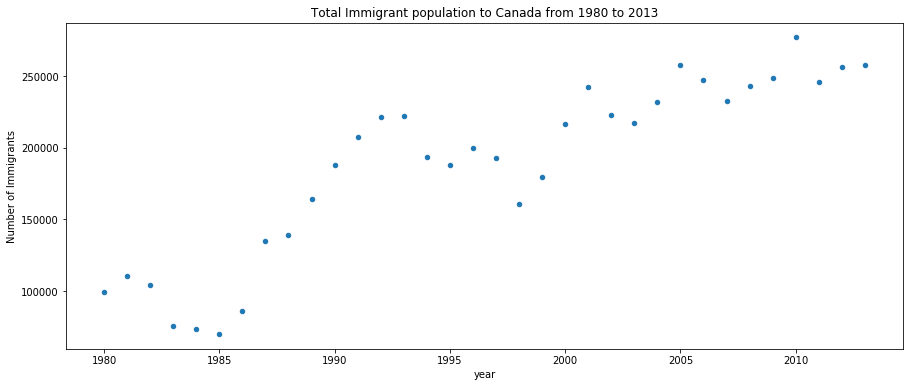

In [8]:
df_total.plot(kind='scatter',x='year',y='total',figsize=(15,6))

plt.title('Total Immigrant population to Canada from 1980 to 2013')
plt.xlabel('year')
plt.ylabel('Number of Immigrants')

plt.show()